### Note: You can use any packages, functions, unless explicitly specified

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.ticker as ticker

%matplotlib inline

In [354]:
# Q1.  Given a list of numbers (no duplicates). Implement the following function to 
# return a list, in which odd numbers come first before even numbers. 
# For example, if nums = [2, 1, 3, 6, 9, 4, 12], 
# the function should return [1, 3, 9, 2, 6, 4, 12]
# Do not change the relative order within odd and even numbers (10 points)

In [355]:
def odd_before_even(nums):
    odd  = [n for n in nums if n % 2 != 0]
    even = [n for n in nums if n % 2 == 0]
    return sorted(odd) + sorted(even)

print(odd_before_even([2, 1, 3, 6, 9, 4, 12]))

[1, 3, 9, 2, 4, 6, 12]


In [356]:
# Q2. Implment the same functionality as Q1, but you can not create a temporary list, 
# dictionay, tuple or any other collection data type this time.  
# You can ignore the relative order this time, as long as
# the odd numbers come first before even number. Which means
# [1, 3, 9, 2, 6, 4, 12], [1, 3, 9, 6, 2, 4, 12] are both correct. (10 points)

In [357]:
def odd_before_even_inplace(nums):
    return sorted(nums, key=lambda v: (v%2==0, v))
print(odd_before_even_inplace([2, 1, 3, 6, 9, 4, 12]))

[1, 3, 9, 2, 4, 6, 12]


In [358]:
# Q3 Given a string (could be a multiple line string)
# Count the number of each word and return a dictionary
# For example
# a_sentence = """
# Python is great, you just need more practice!
# Have fun is also important
# """
# should return 
#{'Python': 1, 'is': 2, 'great': 1, 'you': 1, 'just': 1, 'need': 1, 'more': 1, 
#'practice': 1, 'Have': 1, 'fun': 1, 'also': 1, 'important': 1}

# Hint, you can use the re package to handle special characters (20 points)

In [359]:
import re
def get_freq(a_sentence):
    myDict = {}
    mySentence = a_sentence.lower().split()
    mySentence1 = [re.sub('[^a-zA-Z0-9]+', '', _) for _ in mySentence] 
    for word in mySentence1:
        if word in myDict:
            myDict[word] += 1
        else:
           myDict[word] = 1
    return myDict

print( get_freq("""
 !Python is great, you just need more practice!
 Have fun is also important
 """))

{'python': 1, 'is': 2, 'great': 1, 'you': 1, 'just': 1, 'need': 1, 'more': 1, 'practice': 1, 'have': 1, 'fun': 1, 'also': 1, 'important': 1}


In [360]:
# Q4 Create a class Flower having the following properties
# - petal_width
# - petal_length
# - sepal_width
# - sepal_length
# and the following methods:
# get_information() - return the information of the four properties
# set_properties(petal_width, petal_length, sepal_width, sepal_length)  
#    - allow you to update the values of four properties at once
# 
# Create a subclass named Iris that inherits from Flower class
# Add a new property height
# Add a new method get_height()
# Override the method get_information inherited from Flower to get information about the 5 
# properties. (20 points)

In [361]:
class Flower():

    def __init__(self, petal_width, petal_length, sepal_width, sepal_length):
        self.petal_width = petal_width
        self.petal_length = petal_length
        self.sepal_width = sepal_width
        self.sepal_length = sepal_length

    def get_information(self):
        return self.petal_width, self.petal_length, self.sepal_width, self.sepal_length
    
    def set_properties(self, new_petal_width, new_petal_length, new_sepal_width, new_sepal_length):
        self.petal_width = new_petal_width
        self.petal_length = new_petal_length
        self.sepal_width = new_sepal_width
        self.sepal_length = new_sepal_length
    
class Iris(Flower):
    def __init__(self, petal_width, petal_length, sepal_width, sepal_length, height):
        super().__init__(petal_width, petal_length, sepal_width, sepal_length)
        self.height = height

    def get_height(self):
        return self.height
    
    def get_information(self):
        return self.petal_width, self.petal_length, self.sepal_width, self.sepal_length, self.height
              
flower = Flower(10, 21, 69, 2)
print(flower.get_information())
flower.set_properties(67, 2, 8, 15)
print(flower.get_information())
iris = Iris(2,4,6,8,10)
print(iris.get_information())
print(iris.get_height())

(10, 21, 69, 2)
(67, 2, 8, 15)
(2, 4, 6, 8, 10)
10


In [362]:
# Q5, 5.1 Create a dataframe from hospital_beds_global_regional.csv (5 points)

# The column names are explained below
# country : ISO 3166 county code (alpha 2)
# state : ISO 3166 state code (alpha 2)
# county : County/Region name
# lat: Latitude
# lng: Longitude
# type: Type of beds: [TOTAL, ICU, ACUTE, PSYCHIATRIC, OTHER]
# measure: Type of measure: 1000HAB - per 1000 inhabitants
# beds: Number of beds per 1000 inhabitants
# population: Population of location
# year: source year for beds and population
# source: source of data
# source_url: URL of the original source

# 5.2 Fill in the missing state and county name with country name (5 points)
# 5.3 Get the data for 'country' == 'US' and type == 'ICU', plot the relationship between
# population and number of beds (For example, x-axis is the population, y-axis is the number 
# of beds) (10 points)


  country state county    lat   lng   type  measure  number of beds  \
0      AD    AD     AD  42.50   1.5    ICU  1000HAB           0.071   
1      AD    AD     AD  42.50   1.5  TOTAL  1000HAB           2.500   
2      AE    AE     AE  24.00  54.0  TOTAL  1000HAB           1.200   
3      AF    AF     AF  33.00  65.0  TOTAL  1000HAB           0.500   
4      AG    AG     AG  17.05 -61.8  TOTAL  1000HAB           3.800   

   population  year       source  \
0       83747  2011  icm-journal   
1       84463  2009          wdi   
2     9197910  2013          wdi   
3    34413603  2015          wdi   
4       92562  2014          wdi   

                                          source_url  
0  https://link.springer.com/article/10.1007/s001...  
1  https://data.worldbank.org/indicator/SH.MED.BE...  
2  https://data.worldbank.org/indicator/SH.MED.BE...  
3  https://data.worldbank.org/indicator/SH.MED.BE...  
4  https://data.worldbank.org/indicator/SH.MED.BE...  

  country state          

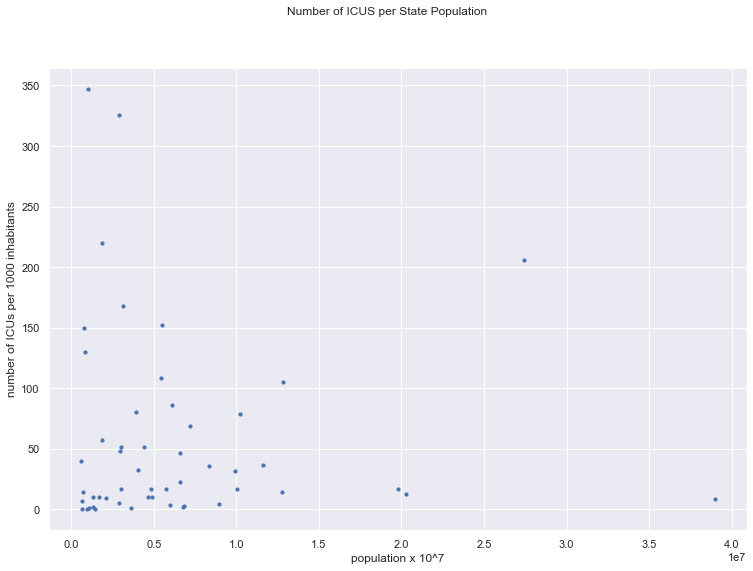

In [379]:
corona = pd.read_csv('hospital_beds_global_regional.csv')
df = pd.DataFrame(corona)
df.columns = ['country', 'state', 'county', 'lat', 'lng', 'type', 'measure', 'number of beds', 'population', 'year', 'source', 'source_url']
df.loc[df['state'].isnull(),'state'] = df['country']
df.loc[df['county'].isnull(),'county'] = df['country']
print(df.head()) #loads dataframe from csv file
print()

covid_data_US_ICU = (df.query('country == "US"').query('type == "ICU"').reset_index(drop = True))
#creates new dataframe that shows information for country = US and bed type = ICU
print(covid_data_US_ICU.head()) 

filtered_data = covid_data_US_ICU.filter(['country','state', 'county', 'population', 'number of beds']).drop(3142)
#I dropped the last row because the last row is the total US population and total number of ICUS the US has.
filtered_data = filtered_data.sort_values(['population'])
total_population_per_state = filtered_data.groupby(['state']).population.sum()
total_icus_per_state = filtered_data.groupby(['state'])['number of beds'].sum()

a = total_population_per_state.values
#a = total population per state
b = total_icus_per_state.values
#b = total number of ICU beds per state

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
plt.scatter(a,b, s=10)
plt.xlabel('population x 10^7')
plt.ylabel('number of ICUs per 1000 inhabitants')
fig.suptitle('Number of ICUS per State Population', fontsize=12)
plt.show() #plots relationship between population and number of beds

In [364]:
# Q6, Extract the data for 'country' == 'US' and type == 'ICU'. Uses three features 
# lat, lng and population to predict the beds. 
# You are free to pick your model. Use 80% for training and 20% for testing
# -- formulation of the correct feature matrix and target vector,  5 points
# -- the approporiate pick of a model, 5 points
# -- correct trainning and prediction, 5 points
# -- correct compararison of the predictions with actual values , 5 points

In [365]:
y = covid_data_US_ICU['number of beds']
x = covid_data_US_ICU.loc[:,('lat', 'lng', 'population')]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20) #establishes feature matrix and and target vector

lin_regression = LinearRegression()
RegressionModel = lin_regression.fit(x_train, y_train) #fit model
y_predRegression = RegressionModel.predict(x_test) #prediction using x_test values

print('input values:',)
print(x_test)
print()
print('y values:')
print(y_test.values)
print()
print('predicted values:')
print(y_predRegression)
print()

MSE = mean_squared_error(y_test, y_predRegression)
print('Slope:', RegressionModel.coef_)
print('Intercept:', RegressionModel.intercept_)
print('Mean Squared Error:', MSE)



input values:
            lat         lng  population
3124  43.075968 -107.290284        7347
1572  32.354668  -89.398528       39763
742   40.633125  -89.398528      704476
2540  31.968599  -99.901813       17955
2064  40.417287  -82.907123       75369
2824  37.431573  -78.656894       55158
34    32.318231  -86.902298       10478
527   32.157435  -82.907123       69433
1961  34.972730 -105.032363       15534
27    63.588753 -154.493062         682
1077  37.839333  -84.270018        9990
1985  43.299428  -74.217933       78175
822   40.551217  -85.602364       67615
2356  33.836081  -81.163725       20228
357   27.664827  -81.515754        8347
1884  41.492537  -99.901813       20953
846   40.551217  -85.602364       10219
1001  37.839333  -84.270018       20017
572   41.878003  -93.097702       17711
1160  31.244823  -92.145024       43565

y values:
[2.17776  0.704172 0.153305 1.39237  0.238825 0.       0.       0.288047
 0.       0.       0.       0.       0.281003 0.       0.     